In [415]:
import pandas as pd
import numpy as np
import pylab
import scipy.stats as stats
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.weightstats import ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols



df = pd.DataFrame(pd.read_csv("V2_MASTER_PhonesmartdataAll_CCI_AdvStats.csv"))
df = df.fillna(0)
df

,Year,Age,GenderNum,AutismQuotient,STAI,BRIEF_Total,Device,DailyAvgMins,DailyAvePickups,VS_RT_correct_Conjunction,VS_RT_correct_Single,Mean_VS_RT_correct_Single,Mean_VS_RT_correct_Conjunction
0,2022,16,2.0,4,49,70,iphone,0,32,1178.700000,1216.387500,827.116332,925.624053
1,2021,37,2.0,8,44,33,iphone,0,32,946.470000,785.597500,0.000000,0.000000
2,2022,16,1.0,4,20,40,iphone,0,32,1182.741667,950.900000,0.000000,0.000000
3,2022,16,1.0,2,21,0,iphone,0,32,1778.950000,984.333333,0.000000,0.000000
4,2022,16,2.0,4,21,0,iphone,0,32,521.500000,503.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,2020,38,1.0,3,56,39,iPhone,507,32,915.785917,747.883194,0.000000,0.000000
544,2020,27,2.0,5,64,77,iPhone,267,32,877.783333,720.729583,0.000000,0.000000
545,2020,36,2.0,2,46,43,iPhone,610,32,1211.483333,1049.979167,0.000000,0.000000
546,2020,31,2.0,4,67,69,iPhone,558,32,899.774583,845.612083,0.000000,0.000000


In [416]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            548 non-null    int64  
 1   Age                             548 non-null    int64  
 2   GenderNum                       548 non-null    float64
 3   AutismQuotient                  548 non-null    int64  
 4   STAI                            548 non-null    int64  
 5   BRIEF_Total                     548 non-null    int64  
 6   Device                          548 non-null    object 
 7   DailyAvgMins                    548 non-null    int64  
 8   DailyAvePickups                 548 non-null    int64  
 9   VS_RT_correct_Conjunction       548 non-null    float64
 10  VS_RT_correct_Single            548 non-null    float64
 11  Mean_VS_RT_correct_Single       548 non-null    float64
 12  Mean_VS_RT_correct_Conjunction  548 

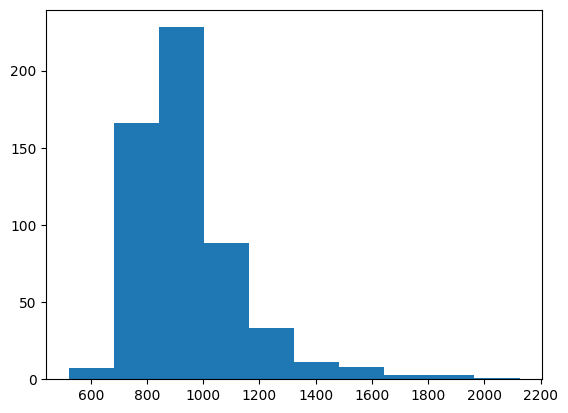

In [417]:

counts, bins = np.histogram(df.VS_RT_correct_Conjunction)
plt.hist(bins[:-1], bins, weights=counts)
plt.show()

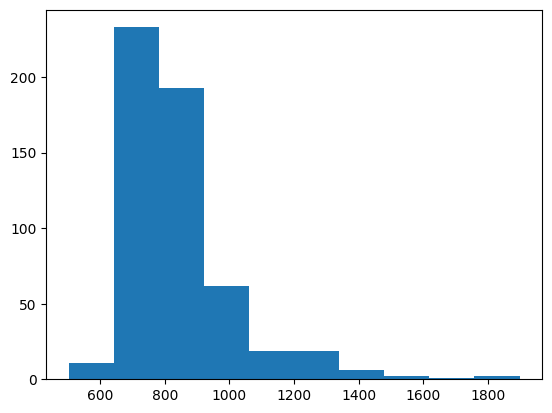

In [418]:

counts, bins = np.histogram(df.VS_RT_correct_Single)
plt.hist(bins[:-1], bins, weights=counts)
plt.show()

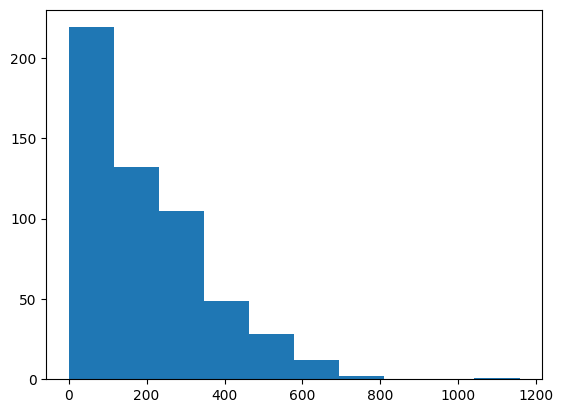

In [419]:

counts, bins = np.histogram(df.DailyAvgMins)
plt.hist(bins[:-1], bins, weights=counts)
plt.show()

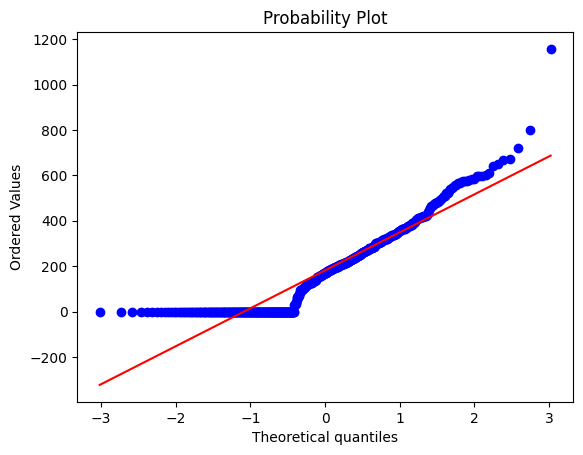

In [420]:
stats.probplot(df.DailyAvgMins, dist="norm", plot=pylab)
pylab.show()

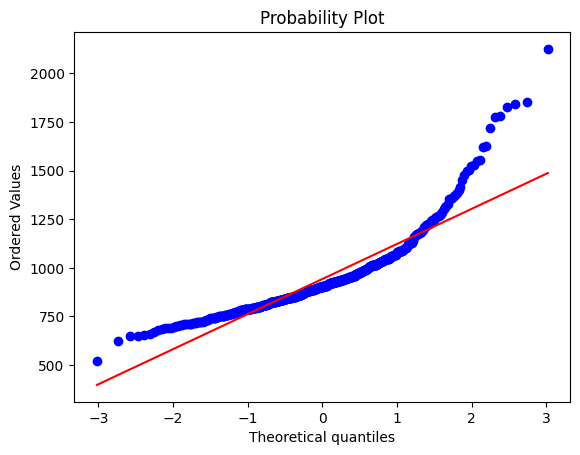

In [421]:
stats.probplot(df.VS_RT_correct_Conjunction, dist="norm", plot=pylab)
pylab.show()

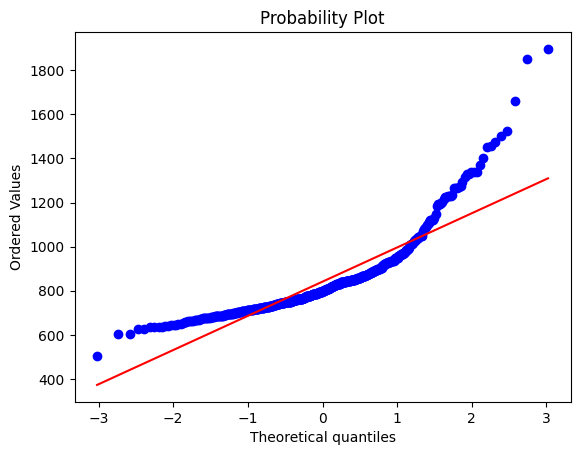

In [422]:
stats.probplot(df.VS_RT_correct_Single, dist="norm", plot=pylab)
pylab.show()

In [423]:
mean = df.DailyAvgMins.mean()
median = df.DailyAvgMins.median()
mean,median

(181.7536496350365, 169.5)

In [424]:
mean = df.VS_RT_correct_Conjunction.mean()
median = df.VS_RT_correct_Conjunction.median()
mean,median

(942.5672747175182, 903.22779165)

In [425]:
mean = df.VS_RT_correct_Single.mean()
median = df.VS_RT_correct_Single.median()
mean,median

(841.4676428459854, 796.9777777500001)

In [426]:
for i in range(len(df)):
    df.loc[i,'UserGroupMins'] = 0 if df.DailyAvgMins.median() > df.loc[i,'DailyAvgMins'] else 1

df


,Year,Age,GenderNum,AutismQuotient,STAI,BRIEF_Total,Device,DailyAvgMins,DailyAvePickups,VS_RT_correct_Conjunction,VS_RT_correct_Single,Mean_VS_RT_correct_Single,Mean_VS_RT_correct_Conjunction,UserGroupMins
0,2022,16,2.0,4,49,70,iphone,0,32,1178.700000,1216.387500,827.116332,925.624053,0.0
1,2021,37,2.0,8,44,33,iphone,0,32,946.470000,785.597500,0.000000,0.000000,0.0
2,2022,16,1.0,4,20,40,iphone,0,32,1182.741667,950.900000,0.000000,0.000000,0.0
3,2022,16,1.0,2,21,0,iphone,0,32,1778.950000,984.333333,0.000000,0.000000,0.0
4,2022,16,2.0,4,21,0,iphone,0,32,521.500000,503.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,2020,38,1.0,3,56,39,iPhone,507,32,915.785917,747.883194,0.000000,0.000000,1.0
544,2020,27,2.0,5,64,77,iPhone,267,32,877.783333,720.729583,0.000000,0.000000,1.0
545,2020,36,2.0,2,46,43,iPhone,610,32,1211.483333,1049.979167,0.000000,0.000000,1.0
546,2020,31,2.0,4,67,69,iPhone,558,32,899.774583,845.612083,0.000000,0.000000,1.0


In [427]:
# Function to check variance
def variance_Check():
    # Print the variance of the arrays (each data group)
    print(np.var(df['VS_RT_correct_Conjunction'].values), np.var(df['VS_RT_correct_Single'].values))

# Function to perform T-Test using SciPy Library
def TTest_SciPy():
    # Perform a Paired-samples t test 
    result = stats.ttest_rel(a=df['VS_RT_correct_Conjunction'].values, b=df['VS_RT_correct_Single'].values)
    print(result)

variance_Check()
TTest_SciPy()

38160.388742612005 29539.038205338806
TtestResult(statistic=28.16162946805784, pvalue=1.6429493626392413e-108, df=547)


In [428]:
# Function to check variance
def variance_Check():
    print(np.var(df['UserGroupMins'].values), np.var(df['VS_RT_correct_Single'].values))

# Function to perform T-Test using SciPy Library
def TTest_SciPy():
    # Perform the two sample t-test with equal variances using SciPy (Scientific Python Library)
    result1 = stats.ttest_ind(a=df['UserGroupMins'].values, b=df['VS_RT_correct_Single'].values, equal_var=True)
    print(result1)

# Function to perform T-Test using Statsmodel package
def TTest_Statsmodels():
    # Perform the two sample t-test with equal variances using Statsmodels
    result2 = ttest_ind(df['UserGroupMins'].values, df['VS_RT_correct_Single'].values)
    print(result2)

variance_Check()
TTest_SciPy()
TTest_Statsmodels()

0.25 29539.038205338806
TtestResult(statistic=-114.43870543069158, pvalue=0.0, df=1094.0)
(-114.4387054306916, 0.0, 1094.0)


In [429]:
# we have to create dataframe where UsageGroupMeans fits to VS_RT_correct_Conjunction and VS_RT_correct_Single
df['Usage_Cat'] = df['UserGroupMins'].apply(lambda x: 'High' if x == 1.0 else 'Low')

# Modified dataframe
df_melted = pd.melt(df, id_vars=['Usage_Cat'], value_vars=['VS_RT_correct_Conjunction', 'VS_RT_correct_Single'],
                  var_name='VS_Type', value_name='VS_ReactionTime')
df_melted


,Usage_Cat,VS_Type,VS_ReactionTime
0,Low,VS_RT_correct_Conjunction,1178.700000
1,Low,VS_RT_correct_Conjunction,946.470000
2,Low,VS_RT_correct_Conjunction,1182.741667
3,Low,VS_RT_correct_Conjunction,1778.950000
4,Low,VS_RT_correct_Conjunction,521.500000
...,...,...,...
1091,High,VS_RT_correct_Single,747.883194
1092,High,VS_RT_correct_Single,720.729583
1093,High,VS_RT_correct_Single,1049.979167
1094,High,VS_RT_correct_Single,845.612083


In [430]:
df_annova = pd.DataFrame({'Usage_Cat': df_melted.Usage_Cat,
                   'VS_Type': df_melted.VS_Type,
                   'VS_ReactionTime': df_melted.VS_ReactionTime})

model = ols('VS_ReactionTime ~ C(Usage_Cat) + C(VS_Type) + C(Usage_Cat):C(VS_Type)', data=df_annova).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Usage_Cat),5.459761e+05,1.0,16.310879,5.751212e-05
C(VS_Type),2.800591e+06,1.0,83.666852,2.791943e-19
C(Usage_Cat):C(VS_Type),6.554070e+02,1.0,0.019580,8.887420e-01
Residual,3.655265e+07,1092.0,NaN,NaN


We can see form the results that Usage Category has significant impact on Reaction Time, VS has even more impact on the output. However we can acknowledge that combination of factors - Usage Category and VS Type - has no impact on VS Reaction Time.